In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from momaapi import MOMA

In [4]:
epoch = 99
vid = "WWq7YYB22r8"
path = f"/data/dir_moma/plot/{epoch}/{vid}.pt"

data = torch.load(path)
src_vid = data["src_vid"]
src_activity_name = data["src_activity_name"]
# trg_activity_names = data["trg_activity_names"]
pred_similarities = data["pred_similarities"]
proxy_similarities = data["proxy_similarities"]

moma = MOMA("/data/dir_moma")
ids_act = moma.get_ids_act(split='val')
anns_act = moma.get_anns_act(ids_act)
trg_activity_names = [x.cname for x in anns_act if x.id != src_vid]

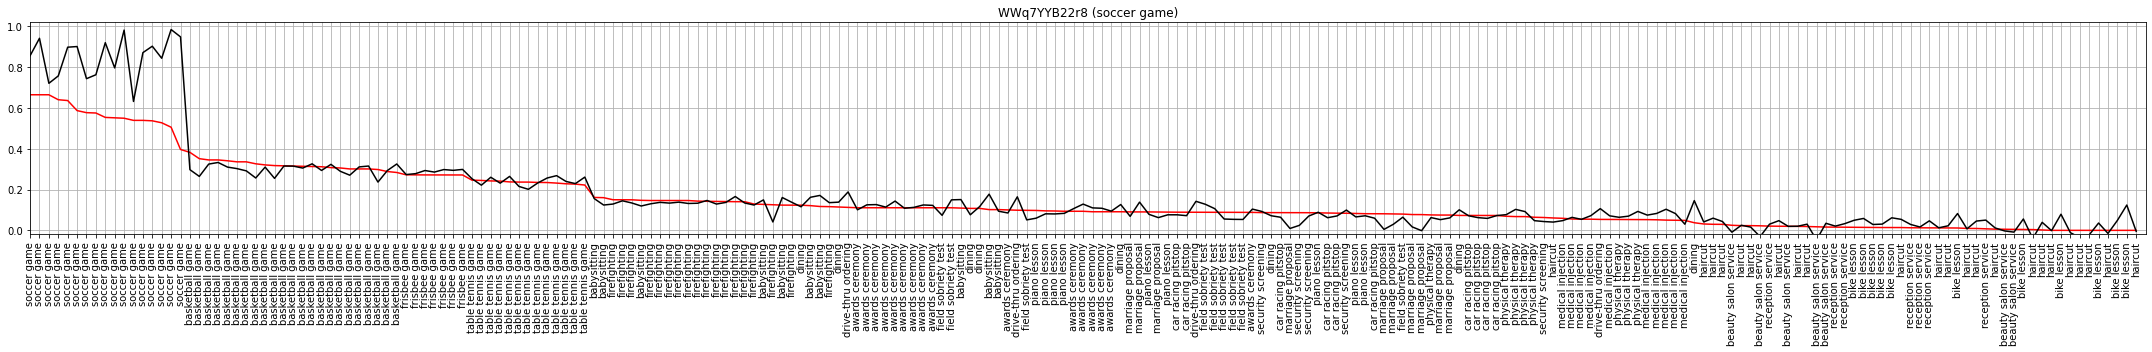

In [5]:
_, idx = torch.sort(proxy_similarities, descending=True)
proxy_y = proxy_similarities[idx].detach().cpu().numpy()
pred_y = pred_similarities[idx].detach().cpu().numpy()
x_label = [trg_activity_names[i] for i in idx]

plt.figure(figsize=(30, 5))
plt.title(f"{src_vid} ({src_activity_name})")
plt.xticks(np.arange(len(x_label)), label=x_label, rotation=90)
plt.gca().set_xticklabels(x_label)
plt.xlim([0, len(trg_activity_names)])
plt.ylim([-0.02, 1.02])
plt.grid(True)
plt.tight_layout()

plt.plot(np.arange(len(proxy_similarities)), proxy_y, color="red")
plt.plot(np.arange(len(pred_similarities)), pred_y, color="black")

plt.show()